In [1]:
# Import our dependencies
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf



**Preparing the data For Model1 - where we are predicting if the 'favorite' horse wins, we used two datasets from "Kaggle" as listed below:**

*dataset 1 = races_* columns description: 
- rid - Race id; 
- Distance
- winningTime - Best time shown
- metric - Distance in meters
- class - class type (created from rclass feature).

*dataset 2 = horses_* columns description: 
- rid - Race id (column used to merge the 2 datasets)
- age - Horse age; 
- saddle - Saddle # where horse starts; 
- isFav - Was horse favorite before start? Can be more then one fav in a race;  
- position - Finishing position, 40 if horse didn't finish; 
- positionL - how far a horse has finished from the pursued horse, horses corpses; 
- outHandicap - Handicap; 
- RPR - RP Rating; 
- TR - Topspeed; 
- OR - Official Rating father - Horse's Father name; 
- runners - Runners total; 
- weight - Horse weight in kg; 
- res_win - Horse won or not; 


### For data clean up pls refer to CleanUp file 

# **Preprocessing Model 2 - Characteristics of a Horse winner**

 Step 1: Read the clean_data_model1.csv data from the Resources folder into a Pandas DataFrame.

In [3]:
clean_m2_df = pd.read_csv("Resources/clean_data_model1.csv")
clean_m2_df.head(5)

,rid,winningTime,metric,ncond,class,age,decimalPrice,isFav,position,positionL,distance,outHandicap,RPR,saddle,TR,OR,runners,weight,res_win
0,10312,253.88,3218.0,10,4,4,0.076923,0.0,1,4.57028,2.0,2.541359,103.0,9.0,103.0,74.677073,9.0,66.0,1.0
1,10312,253.88,3218.0,10,4,6,0.444444,1.0,2,15.00000,2.0,2.541359,96.0,7.0,89.0,110.000000,9.0,65.0,0.0
2,10312,253.88,3218.0,10,4,7,0.019608,0.0,3,5.50000,2.0,2.541359,97.0,5.0,88.0,74.677073,9.0,72.0,0.0
3,10312,253.88,3218.0,10,4,6,0.230769,0.0,4,10.00000,2.0,2.541359,89.0,4.0,75.0,74.677073,9.0,72.0,0.0
4,10312,253.88,3218.0,10,4,7,0.038462,0.0,5,5.50000,2.0,2.541359,82.0,6.0,67.0,74.677073,9.0,72.0,0.0


In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
coverted_df= pd.get_dummies(clean_m2_df)

In [5]:
#drop any NaN from the dataset
coverted_df = clean_m2_df.dropna()


In [6]:
# Determine the number of unique values in each column.
unique_application = coverted_df.nunique()
print(unique_application)

rid             5617
winningTime     4375
metric            49
ncond             15
class              8
age               14
decimalPrice     274
isFav              2
position          25
positionL        106
distance           7
outHandicap       16
RPR              169
saddle            29
TR               157
OR               151
runners           26
weight            33
res_win            2
dtype: int64


In [7]:
# Look at isFav value counts for binning - where 0=not fav; 1=fav
application_type_counts = coverted_df['isFav'].value_counts()
application_type_counts

isFav
0.0    33733
1.0     4841
Name: count, dtype: int64

In [8]:
# save to csv to visualize data
coverted_df.to_csv('Resources/coverted_df_m2.csv', index=False)

### Further steps in the model-building process: feature selection, model selection, training, and evaluation ###

In [8]:
#feature selection - In this case our target is if the favorite horse wins
y = coverted_df["res_win"]
X = coverted_df.drop(columns="res_win")

In [9]:
#splitting the data in train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(28930, 18)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model
### Since our Model 1 is trying to answer does a  "favorite horse" wins? Yes or No, we are using a classification model 

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
coverted_df = tf.keras.models.Sequential()

# First hidden layer
coverted_df.add(tf.keras.layers.Dense(units=500, activation="relu", input_dim=X_train.shape[1]))

# Second hidden layer
coverted_df.add(tf.keras.layers.Dense(units=150, activation="sigmoid"))

# Output layer
coverted_df.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
coverted_df.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               9500      
                                                                 
 dense_1 (Dense)             (None, 150)               75150     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 84,801
Trainable params: 84,801
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
coverted_df.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(28930, 18)
(9644, 18)


In [13]:
coverted_df = tf.keras.Sequential([
    tf.keras.layers.Dense(80, input_dim=X_train.shape[1], activation="sigmoid"),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

coverted_df.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

coverted_df.fit(X_train_scaled, y_train, epochs=10)

# Scale the test data
X_test_scaled = X_scaler.transform(X_test)




Epoch 1/10
905/905 [==============================] - 1s 797us/step - loss: 0.2004 - accuracy: 0.9190
Epoch 2/10
905/905 [==============================] - 1s 778us/step - loss: 0.1281 - accuracy: 0.9427
Epoch 3/10
905/905 [==============================] - 1s 761us/step - loss: 0.1262 - accuracy: 0.9422
Epoch 4/10
905/905 [==============================] - 1s 794us/step - loss: 0.1250 - accuracy: 0.9422
Epoch 5/10
905/905 [==============================] - 1s 781us/step - loss: 0.1244 - accuracy: 0.9427
Epoch 6/10
905/905 [==============================] - 1s 781us/step - loss: 0.1232 - accuracy: 0.9428
Epoch 7/10
905/905 [==============================] - 1s 787us/step - loss: 0.1218 - accuracy: 0.9434
Epoch 8/10
905/905 [==============================] - 1s 784us/step - loss: 0.1212 - accuracy: 0.9426
Epoch 9/10
905/905 [==============================] - 1s 772us/step - loss: 0.1205 - accuracy: 0.9445
Epoch 10/10
905/905 [==============================] - 1s 778us/step - loss: 0.119

In [14]:
# Evaluate the model on the scaled test data
loss, accuracy = coverted_df.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

302/302 [==============================] - 0s 656us/step - loss: 0.1160 - accuracy: 0.9469
Loss: 0.11602123826742172
Accuracy: 0.94691002368927


In [15]:
# Make predictions on the test data
y_pred = coverted_df.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

302/302 [==============================] - 0s 596us/step


In [16]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)


Precision: 0.7692901234567902


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      8434
         1.0       0.77      0.82      0.80      1210

    accuracy                           0.95      9644
   macro avg       0.87      0.89      0.88      9644
weighted avg       0.95      0.95      0.95      9644



In [18]:
# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})

# Filter under favorite horse - column y_test= 'isFav' (Actual = 1)
favorite_horse_df = results_df[results_df['Actual'] == 1]

# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()

# Print the average win rate for the favorite horse
print("Average Win Rate for Favorite Horse:", favorite_horse_win_rate)



Average Win Rate for Favorite Horse: 0.8239669421487603


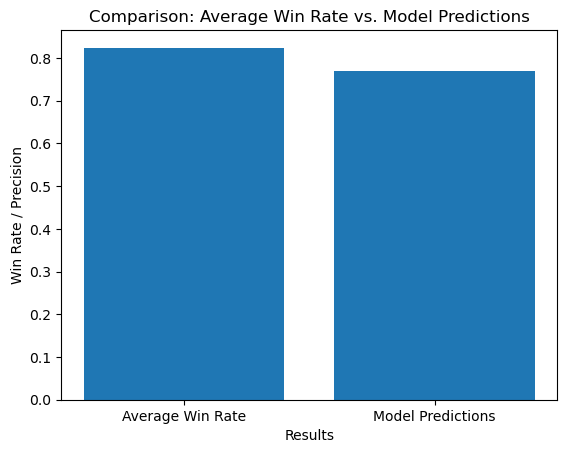

In [19]:
import matplotlib.pyplot as plt

# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()

# Plotting the results
labels = ['Average Win Rate', 'Model Predictions']
values = [favorite_horse_win_rate, precision]

plt.bar(labels, values)
plt.xlabel('Results')
plt.ylabel('Win Rate / Precision')
plt.title('Comparison: Average Win Rate vs. Model Predictions')
plt.show()


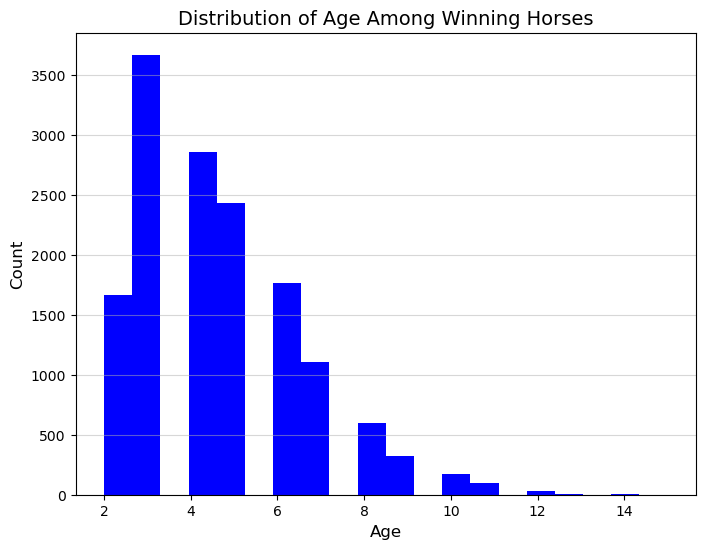

In [24]:
# Filter the dataset to include only winning horses
winning_horses_df = clean_m1_df[clean_m1_df['res_win'] == 1]

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the age distribution of winning horses
plt.hist(winning_horses_df['age'], bins=20, color='blue')

# Add gridlines
plt.grid(axis='y', alpha=0.5)

# Customize colors and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Age Among Winning Horses', fontsize=14)

# Set a light background color
plt.gca().set_facecolor('white')

# Show the plot
plt.show()


In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

# Load the race data
race_data = pd.read_csv('race_data.csv')

# Prepare the figure and axes
fig, ax = plt.subplots()

# Define the update function for each frame of the animation
def update(frame):
    # Clear the previous plot
    ax.clear()
    
    # Plot the positions of the horses at the current timestamp
    ax.scatter(race_data['x'][frame], race_data['y'][frame], color='blue')
    
    # Customize the plot
    ax.set_xlim(0, 1000)  # Adjust the x-axis limits according to your data
    ax.set_ylim(0, 1000)  # Adjust the y-axis limits according to your data
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title('Race Animation')
    
    # Additional customization and annotations if needed
    
# Create the animation
animation = animation.FuncAnimation(fig, update, frames=len(race_data), interval=200)

# Save the animation as a GIF or video file
animation.save('race_animation.gif', writer='pillow')

# Display the animation
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'race_data.csv'